In [2]:
import numpy as np
import re
import pickle
import visualkeras
from PIL import Image
import argparse
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Input,Dense,Conv2D,Add
from tensorflow.keras.layers import SeparableConv2D,ReLU
from tensorflow.keras.layers import BatchNormalization,MaxPool2D
from tensorflow.keras.layers import GlobalAvgPool2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.applications import xception
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Activation, Input, Dense, SeparableConv2D
from keras.models import Model
from keras.regularizers import l2
from keras.layers import Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
def get_data(data_dir):
    data = []
    images=[]
    labels={"PET":0,"polyethylenes":1,"polypropylene":2,"polystyrenes":3}
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels[label]
        for img in os.listdir(path):
            image= os.path.join(path,img)
            image=np.array(Image.open(image))
            data.append(image)
            images.append(class_num)
    return data,images

In [ ]:
train,train_val =get_data('C:\My files\project\dataset\Wadaba')
train=np.array(train)
train_val=np.array(train_val)
print(train,train_val)
test,test_val =get_data('C:\My files\project\dataset\Wadaba')
print(test,test_val)

<ipython-input-3-26faaa402d1f>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  train=np.array(train)


[array([[[44, 41, 34],
        [43, 40, 31],
        [44, 41, 32],
        ...,
        [32, 31, 27],
        [31, 30, 26],
        [32, 31, 27]],

       [[44, 41, 34],
        [43, 40, 33],
        [45, 42, 33],
        ...,
        [33, 32, 28],
        [31, 30, 26],
        [31, 30, 26]],

       [[45, 42, 35],
        [43, 40, 33],
        [43, 40, 31],
        ...,
        [33, 29, 26],
        [34, 30, 27],
        [34, 30, 27]],

       ...,

       [[80, 68, 54],
        [79, 67, 53],
        [78, 66, 52],
        ...,
        [58, 51, 43],
        [58, 51, 43],
        [58, 51, 43]],

       [[80, 68, 54],
        [78, 66, 52],
        [76, 67, 52],
        ...,
        [59, 52, 42],
        [59, 52, 44],
        [59, 52, 44]],

       [[77, 68, 53],
        [72, 63, 48],
        [73, 64, 49],
        ...,
        [61, 52, 43],
        [60, 51, 42],
        [60, 53, 43]]], dtype=uint8)
 array([[[51, 44, 34],
        [50, 44, 32],
        [50, 44, 30],
        ...,
        [35

In [2]:
train_batch = ImageDataGenerator(featurewise_center=False,
                                 samplewise_center=False, 
                                 featurewise_std_normalization=False, 
                                 samplewise_std_normalization=False, 
                                 zca_whitening=False, 
                                 rotation_range=180, 
                                 width_shift_range=0.2, 
                                 height_shift_range=0.2, 
                                 horizontal_flip=True, 
                                 vertical_flip=True,rescale=1./255,validation_split=0.1).flow_from_directory('C:\My files\project\dataset\Wadaba', 
                                                                          target_size=(224,224),
                                                                          color_mode="rgb",
                                                                          class_mode="categorical",
                                                                          classes=["PET","Others"],subset="training")
test_batch = ImageDataGenerator(featurewise_center=False,
                                 samplewise_center=False, 
                                 featurewise_std_normalization=False, 
                                 samplewise_std_normalization=False, 
                                 zca_whitening=False, 
                                 rotation_range=0, 
                                 horizontal_flip=False, 
                                 vertical_flip=False,rescale=1./255,validation_split=0.1).flow_from_directory('C:\My files\project\dataset\Wadaba', 
                                                                          target_size=(224,224),
                                                                          color_mode="rgb",
                                                                          class_mode="categorical",
                                                                          classes=["PET","Others"],subset="validation")


Found 3564 images belonging to 2 classes.
Found 396 images belonging to 2 classes.


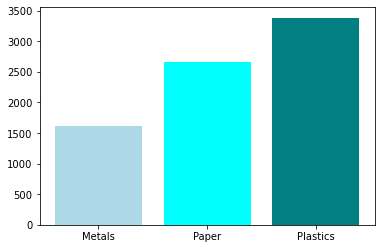

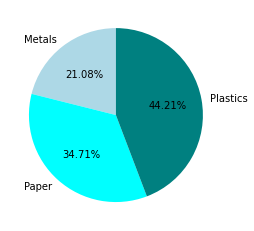

In [31]:

m=0
p=0
pl=0
for i in train_val:
    if i==0:
        m+=1
    elif i==1:
        p+=1
    else:
        pl+=1   
plt.bar("Metals",m,color="lightblue")       
plt.bar("Paper",p,color="cyan")
plt.bar("Plastics",pl,color="teal")
plt.show()
plt.pie([m,p,pl],labels=["Metals","Paper","Plastics"],autopct='%0.2f%%',startangle=90,colors=["lightblue","cyan","teal"])
plt.show()

In [3]:
def cnn_model3():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',input_shape=(224,224,3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(128, kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(512, kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(8000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))
    model.summary()
    return model

In [12]:
def Xception(input_shape, num_classes):

    l2_reg = 1e-4
    img_input = Input(shape=input_shape)
 
    x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False,
               kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), use_bias=False,
               kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
 
    residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
 
    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
 
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])
 
    residual = Conv2D(256, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
 
    x = Activation('relu')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
 
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])
 
    residual = Conv2D(728, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
 
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
 
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])
 

    residual = x
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = layers.add([x, residual])

    residual = x
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = layers.add([x, residual])

    residual = x
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = layers.add([x, residual])

    residual = x
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = layers.add([x, residual])

    residual = x
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = layers.add([x, residual])

    residual = x
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = layers.add([x, residual])

    residual = x
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = layers.add([x, residual])

    residual = x
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = layers.add([x, residual])

    
 
    residual = Conv2D(1024, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
 
    x = Activation('relu')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
 
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])
 
    x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
 
    x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False,
                        kernel_regularizer=l2(l2_reg), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
 
    
    x = GlobalAveragePooling2D()(x)
 
    model = Model(img_input, x)
    return model

In [15]:
base_model = Xception((224,224,3),2)
model=Sequential()
model.add(base_model) 
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(5000,activation="relu",kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1000,activation="relu",kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(500,activation="relu",kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(2,activation="sigmoid"))

In [16]:

"""
train_val=tf.cast(list(map(int,train_val)),tf.int32)
test_val=tf.cast(list(map(int,test_val)),tf.int32)
#train_val=tf.reshape(train_val,(-1,1))
"""
#model = Xception((224,224,3),2)
#model=tf.keras.models.load_model("savedmodelcnn3classplastics.h5")
#model=cnn_model3()
print(model.summary())
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics =['accuracy'])
checkpoint = ModelCheckpoint(filepath = 'cnn.hdf5', verbose = 1, save_best_only = True,monitor="val_accuracy")
#fitting_model=model.fit(x =np.array(train),y=np.array(train_val),validation_split=0.2,epochs=10,callbacks=[checkpoint])
fitting_model=model.fit(train_batch,epochs=15,callbacks=[checkpoint],validation_data=test_batch)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_6 (Functional)         (None, 2048)              20861480  
_________________________________________________________________
dropout_15 (Dropout)         (None, 2048)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_289 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_11 (Dense)             (None, 5000)              10245000  
_________________________________________________________________
batch_normalization_290 (Bat (None, 5000)              20000     
_________________________________________________________________
dropout_16 (Dropout)         (None, 5000)             

C:\Users\ronyj\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
112/112 [==============================] - 1753s 16s/step - loss: 0.3091 - accuracy: 0.8796 - val_loss: 0.7069 - val_accuracy: 0.5556

Epoch 00002: val_accuracy did not improve from 0.55556
Epoch 3/15
112/112 [==============================] - 1736s 15s/step - loss: 0.2456 - accuracy: 0.9155 - val_loss: 0.8203 - val_accuracy: 0.4444

Epoch 00003: val_accuracy did not improve from 0.55556
Epoch 4/15
112/112 [==============================] - 1744s 16s/step - loss: 0.2171 - accuracy: 0.9254 - val_loss: 1.8045 - val_accuracy: 0.4444

Epoch 00004: val_accuracy did not improve from 0.55556
Epoch 5/15
112/112 [==============================] - 1746s 16s/step - loss: 0.2019 - accuracy: 0.9251 - val_loss: 1.5351 - val_accuracy: 0.3737

Epoch 00005: val_accuracy did not improve from 0.55556
Epoch 6/15
112/112 [==============================] - 1757s 16s/step - loss: 0.1789 - accuracy: 0.9414 - val_loss: 0.7912 - val_accuracy: 0.7273

Epoch 00006: val_accuracy improved from 0.55556 to

In [3]:
model=load_model("savedmodelXceptionplastics.h5")
visualkeras.layered_view(model)
#model.save("savedmodelXceptionplastics.h5")

#loadedmodel = pickle.load(open(savedmodelcnn, 'rb'))

In [23]:
assign = {0:"PET",1:"Others"}
epochs_range = range(1,16)
acc = fitting_model.history['accuracy']
#val_acc = fitting_model.history['val_accuracy']
loss = fitting_model.history['loss']
#val_loss = fitting_model.history['val_loss']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()



NameError: name 'fitting_model' is not defined

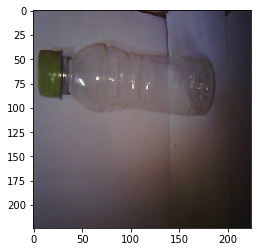

The waste is predicted to be PET


In [25]:
img_path = "C:\My files\project\dataset\Wadaba\Randomtest\\from_bin.jpg"
img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()
img=np.array(img)
img = img.reshape(1,224,224, 3)
print("The waste is predicted to be "+assign[np.argmax(model.predict(img))])